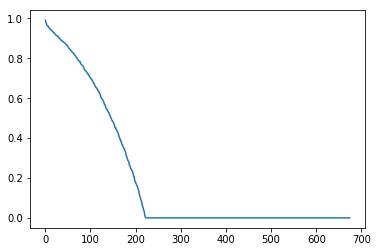

In [3]:
import pickle
import os
from scipy.linalg import eig
from scipy.linalg import sqrtm
from scipy.linalg import inv
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import cv2
import random

def plot_image(vector):
    vector = ((vector + 1.0) / 2.0) * 255.0
    vector = np.reshape(vector, (15, 15, 3))
    p = vector.astype("uint8")
    p = cv2.resize(p, (100, 100))
    count = 0
    plt.imshow(p)
    plt.show()

DATA_DIR = "hw05-data"
d = 15 * 15 * 3

x_train = [((i / 255) * 2.0 - 1.0).flatten().reshape(d, 1) for i in pickle.load( open(os.path.join(DATA_DIR,"x_train.p"), "rb") )]
y_train = [((i / 255) * 2.0 - 1.0).flatten().reshape(d, 1) for i in pickle.load( open(os.path.join(DATA_DIR,"y_train.p"), "rb") )]
x_test = [((i / 255) * 2.0 - 1.0).flatten().reshape(d, 1) for i in pickle.load( open(os.path.join(DATA_DIR,"x_test.p"), "rb") )]
y_test = [((i / 255) * 2.0 - 1.0).flatten().reshape(d, 1) for i in pickle.load( open(os.path.join(DATA_DIR,"y_test.p"), "rb") )]

n = len(x_train)
Sxx = np.zeros( (d, d), "float" )
Syy = np.zeros( (d, d), "float" )
Sxy = np.zeros( (d, d), "float" )

for i in range(n):
    x_mean = np.mean(x_train[i])
    y_mean = np.mean(y_train[i])
    Sxx += np.matmul( (x_train[i] - x_mean), (x_train[i] - x_mean).T)
    Syy += np.matmul( (y_train[i] - y_mean), (y_train[i] - y_mean).T)
    Sxy += np.matmul( (x_train[i] - x_mean), (y_train[i] - y_mean).T)
    
Sxx /= n
Syy /= n
Sxy /= n
        
I = np.identity( d, "float")
lamb = 0.00001

M = inv(sqrtm(Sxx + lamb * I)).dot(Sxy).dot(inv(sqrtm(Syy + lamb * I)))
U, s, V = svd(M)
plt.figure()
plt.plot(s)
plt.show()

/home/taflab/.local/lib/python3.5/site-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()


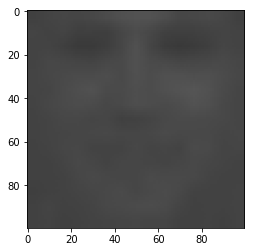

In [46]:
plot_image(U[:, 0] + np.mean(x_train[0]))

/home/taflab/.local/lib/python3.5/site-packages/ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part


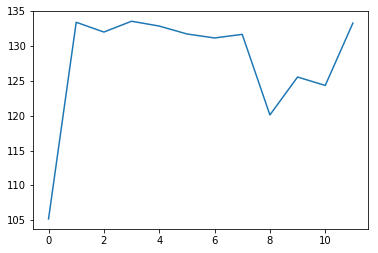

In [47]:
k = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 650]
Pk = U[:, k]

X = np.concatenate(tuple([i.T for i in x_train]))
Y = np.concatenate(tuple([i.T for i in y_train]))
XPk = np.matmul(X, Pk)

I = np.identity(XPk.shape[1])
w = np.matmul( inv( np.matmul(XPk.T, XPk) + lamb * I), np.matmul(XPk.T, Y) )

X_test = np.concatenate(tuple([i.T for i in x_test]))
Y_test = np.concatenate(tuple([i.T for i in y_test]))

error = np.zeros(len(k), "float")
for i in range(len(k)):
    Pi = Pk[:, i].reshape(675, 1)
    wi = w[i, :].reshape(1,675)
    Y_estimate = X_test.dot(Pi).dot(wi)
    error[i] = np.sum((Y_test - Y_estimate) ** 2) / len(Y_diff)
    
plt.figure()
plt.plot(error)
plt.show()

[159, 65, 189, 91]
Image 159


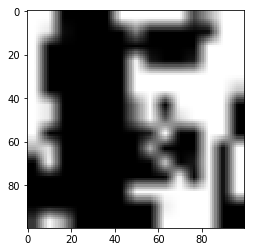

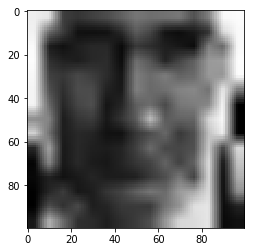

/home/taflab/.local/lib/python3.5/site-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()


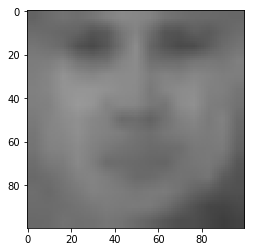

Image 65


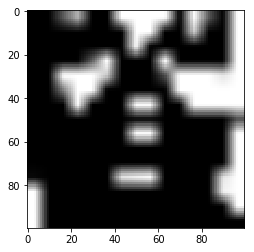

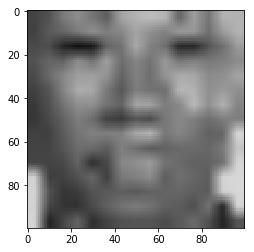

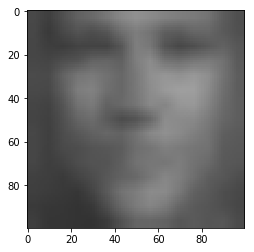

Image 189


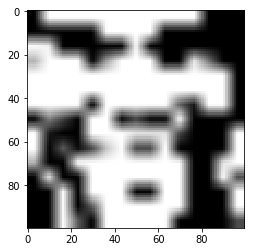

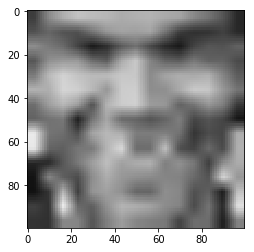

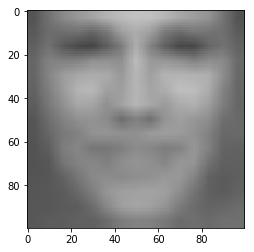

Image 91


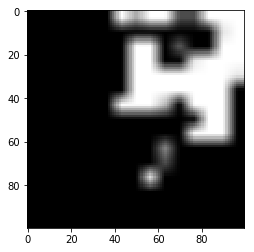

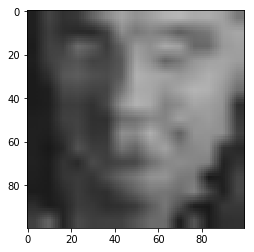

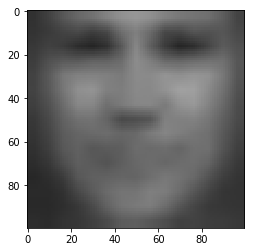

In [52]:
random.seed(5)
lst = [random.randint(0, 254) for _ in range(4)]
print(lst)

for i in lst:
    print("Image " + str(i))
    X = x_test[i].T
    plot_image(X)
    Y = y_test[i].T
    plot_image(Y)
    Y_predicted = X.dot(Pk).dot(w)
#     Y_predicted = X.dot(Pk[:, 3].reshape(675, 1)).dot(w[3, :].reshape(1, 675))
    plot_image(Y_predicted)
    